# Regression examples (Supervised Learning)


> *A regression model provides a function that describes the relationship between **one or more independent variables** and a **response, dependent, or target variable**.*

- Input variables (X, attributes, features, variables)
- Output **target** variable (*y*, target, label)

## The goal is to find a function *f* that fulfills: ***y = f(X)***

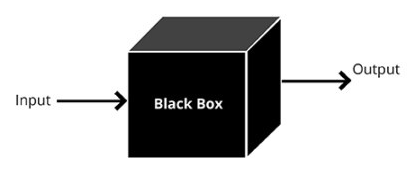

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

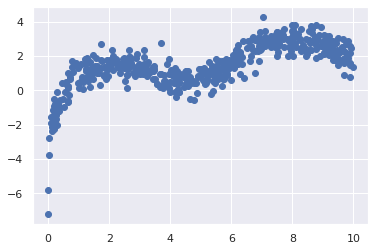

In [2]:
rng = np.random.RandomState(1)
N = 500
x = 10 * rng.rand(N)

y = np.sin(x) + np.log(x) + (0.5 * rng.randn(N))   # SECRET FUNCTION

plt.scatter(x, y)

### Linear Regression

Model slope:     0.31564158105032164
Model intercept: -0.11959077517355077


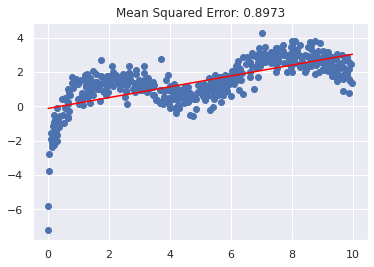

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X))**2).mean():.4f}')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15, include_bias=False)
Xp = poly.fit_transform(x[:, None])

In [5]:
x[:3,None]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03]])

In [6]:
y[:3,None]

array([[ 0.51338467],
       [ 2.68243987],
       [-7.23925812]])

In [7]:
Xp

array([[4.17022005e+00, 1.73907352e+01, 7.25231927e+01, ...,
        1.15363024e+08, 4.81089196e+08, 2.00624781e+09],
       [7.20324493e+00, 5.18867376e+01, 3.73752880e+02, ...,
        1.40561497e+11, 1.01249889e+12, 7.29327749e+12],
       [1.14374817e-03, 1.30815988e-06, 1.49620548e-09, ...,
        5.73185738e-39, 6.55580141e-42, 7.49818589e-45],
       ...,
       [8.44329949e+00, 7.12893062e+01, 6.01916962e+02, ...,
        1.10830304e+12, 9.35773445e+12, 7.90101545e+13],
       [9.20206514e+00, 8.46780029e+01, 7.79212499e+02, ...,
        3.39241476e+12, 3.12172216e+13, 2.87262907e+14],
       [2.27900290e+00, 5.19385422e+00, 1.18368088e+01, ...,
        4.47387052e+04, 1.01959639e+05, 2.32366312e+05]])

y = -3.10 + 5.846·x**1 + 0.757·x**2 + -2.308·x**3 + -1.683·x**4 + 1.318·x**5 + 1.501·x**6 + -2.047·x**7 + 1.079·x**8 + -0.331·x**9 + 0.066·x**10 + -0.009·x**11 + 0.001·x**12 + -0.000·x**13 + 0.000·x**14 + -0.000·x**15


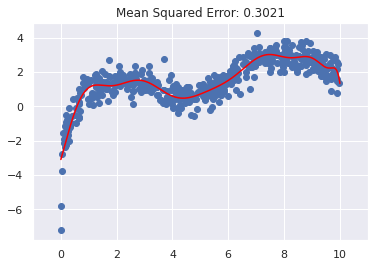

In [8]:
from sklearn.linear_model import Ridge
model = LinearRegression(fit_intercept=True)
model.fit(Xp, y)

xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  ' + '.join([f'{model.intercept_:.2f}'] + [f'{c:.3f}·x**{i+1}' for i, c  in enumerate(model.coef_)] ))

### Control overfitting

### Ridge Regression ($L_2 Regularization$)
$L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

y = ['2.61 x**0 +', '0.71 x**1 +', '-0.30 x**2 +', '-0.47 x**3 +', '0.01 x**4 +', '0.27 x**5 +', '-0.16 x**6 +', '0.03 x**7 +', '-0.00 x**8 +', '-0.00 x**9 +', '0.00 x**10 +', '-0.00 x**11 +', '0.00 x**12 +', '-0.00 x**13 +', '0.00 x**14 +']


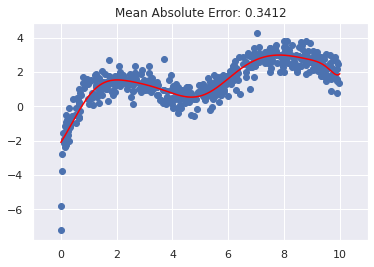

In [9]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2.0)
model.fit(Xp, y)

In [ ]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Absolute Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  [f'{c:.2f} x**{i} +' for i, c  in enumerate(model.coef_)] )

### Neural Networks

In [10]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(1,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="linear"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=keras.optimizers.Adam(0.005), 
              loss="mse", metrics=['mse'],)
model.fit(X,y, batch_size=32, epochs=500,)

Epoch 1/500
16/16 [==============================] - 1s 4ms/step - loss: 0.9221 - mse: 0.9221
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9100 - mse: 0.9100
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9024 - mse: 0.9024
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8969 - mse: 0.8969
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8816 - mse: 0.8816
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8560 - mse: 0.8560
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.8242 - mse: 0.8242
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7979 - mse: 0.7979
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 0.7761 - mse: 0.7761
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.7517 - mse: 0.7517
Epoch 11/500
16/16 [==============================] - 0s 2m

16/16 [==============================] - 0s 1ms/step


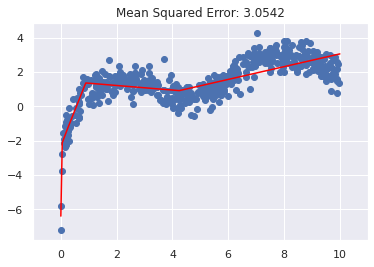

In [12]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X))**2).mean():.4f}')
plt.xlim(left=-1, right=11);

## Neural Networks + Polynomial features

In [13]:
poly = PolynomialFeatures(3, include_bias=False)
Xp = poly.fit_transform(X)

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(3,)),
    keras.layers.Dense(8, activation="relu",),
    keras.layers.Dense(1, activation="linear"),
])

model.compile(optimizer=keras.optimizers.Adam(0.0025), 
              loss="mse", metrics=['mse']
              )
model.fit(Xp, y, batch_size=16, epochs=500)



Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 6.4219 - mse: 6.4219
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8391 - mse: 0.8391
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9269 - mse: 0.9269
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7459 - mse: 0.7459
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - mse: 0.6781
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6607 - mse: 0.6607
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7408 - mse: 0.7408
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5934 - mse: 0.5934
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8722 - mse: 0.8722
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5393 - mse: 0.5393
Epoch 11/500
32/32 [==============================] - 0s 1m

16/16 [==============================] - 0s 1ms/step


(-1.0, 11.0)

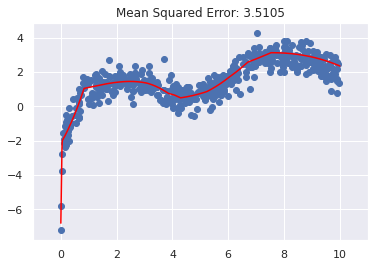

In [16]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)